# Loan Prediction Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
ds=pd.read_csv('loan.csv')

In [53]:
df=pd.DataFrame(ds)

In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
df.shape

(614, 13)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [57]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [70]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [58]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [59]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [60]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [61]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Checking Nullvalues

In [62]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
df.Gender=df.Gender.fillna(df.Gender.mode()[0])

In [64]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [65]:
df.Dependents=df.Dependents.fillna(df.Dependents.mode()[0])

In [66]:
df.Self_Employed=df.Self_Employed.fillna(df.Self_Employed.mode()[0])

In [67]:
df.Credit_History=df.Credit_History.fillna(df.Credit_History.mode()[0])

In [68]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [69]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())

In [71]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0])

In [72]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

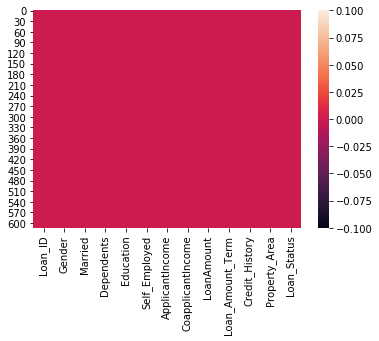

In [73]:
sns.heatmap(df.isnull())

Now there is no null values in this dataset

In [75]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


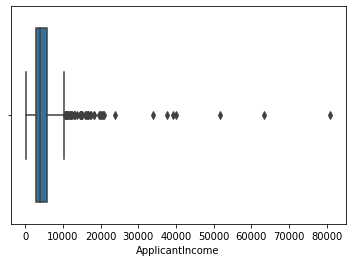

In [76]:
sns.boxplot(df.ApplicantIncome)

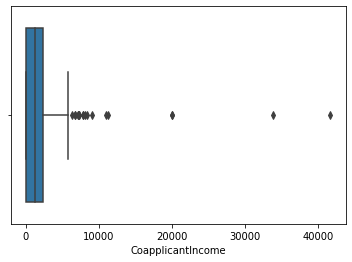

In [77]:
sns.boxplot(df.CoapplicantIncome)

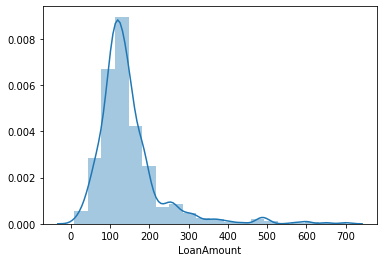

In [80]:
sns.distplot(df.LoanAmount,bins=20)

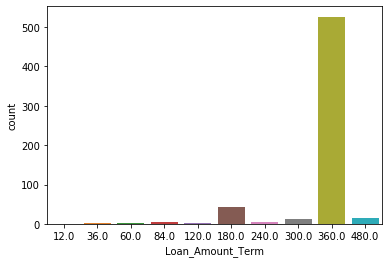

In [84]:
sns.countplot(df.Loan_Amount_Term)

The highest term in this dataset is 360

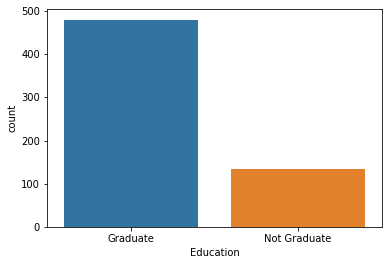

In [85]:
sns.countplot(df.Education)

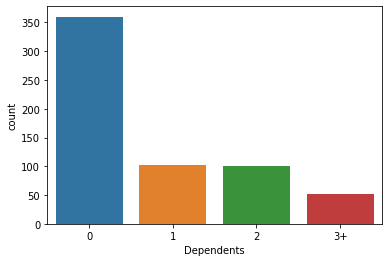

In [87]:
sns.countplot(df.Dependents)

most of the person does not have any dependent in this dataset

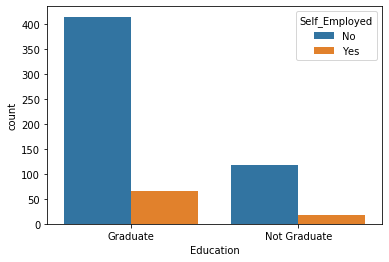

In [92]:
sns.countplot(df.Education,hue=df.Self_Employed)

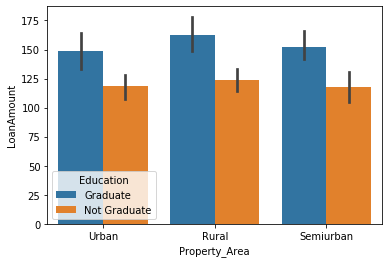

In [94]:
sns.barplot(df.Property_Area,df.LoanAmount,hue=df.Education)

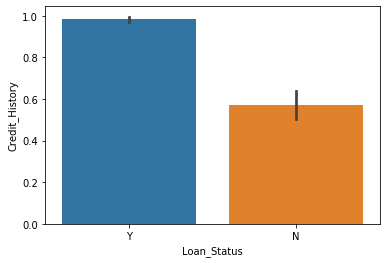

In [96]:
sns.barplot(df.Loan_Status,df.Credit_History)

if credit history increases then chances of loan approval will also increase

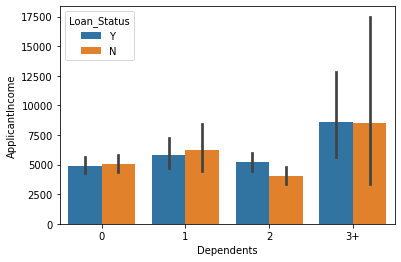

In [103]:
sns.barplot(df.Dependents,df.ApplicantIncome,hue=df.Loan_Status)

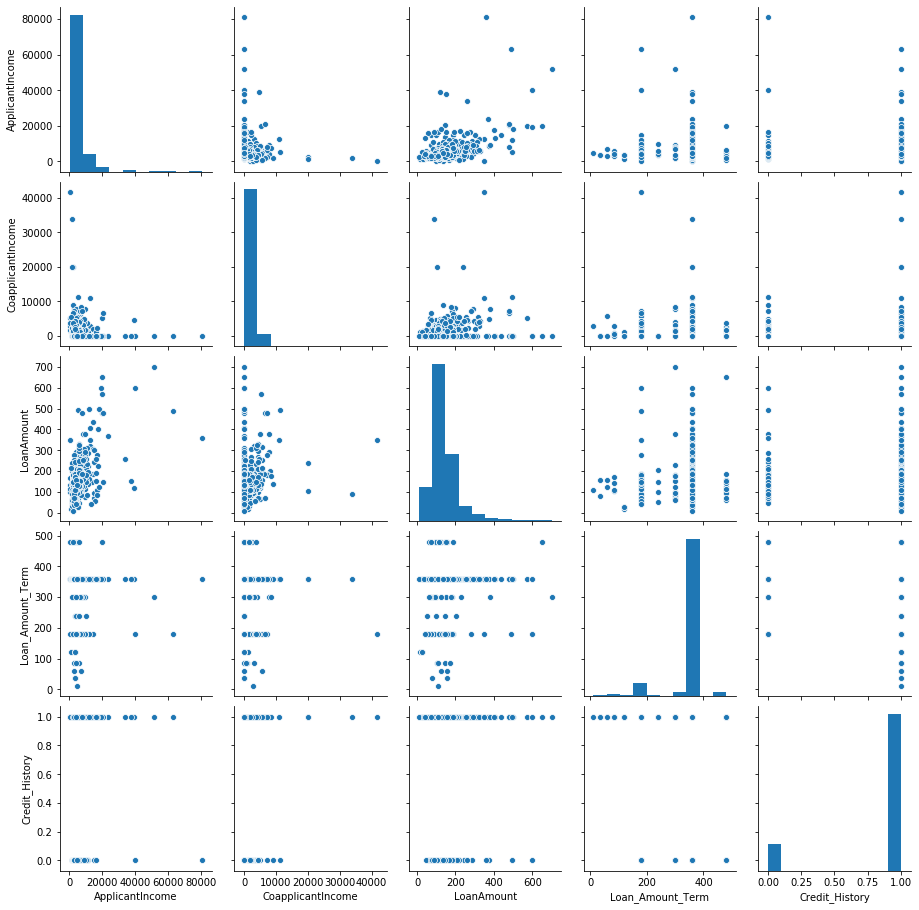

In [105]:
sns.pairplot(df)

# Labeling

In [106]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [107]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [109]:
df[['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']]=df[['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']].apply(le.fit_transform)

In [110]:
df.Loan_Status=le.fit_transform(df.Loan_Status)

In [111]:
df.drop('Loan_ID',axis=1,inplace=True)

In [112]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


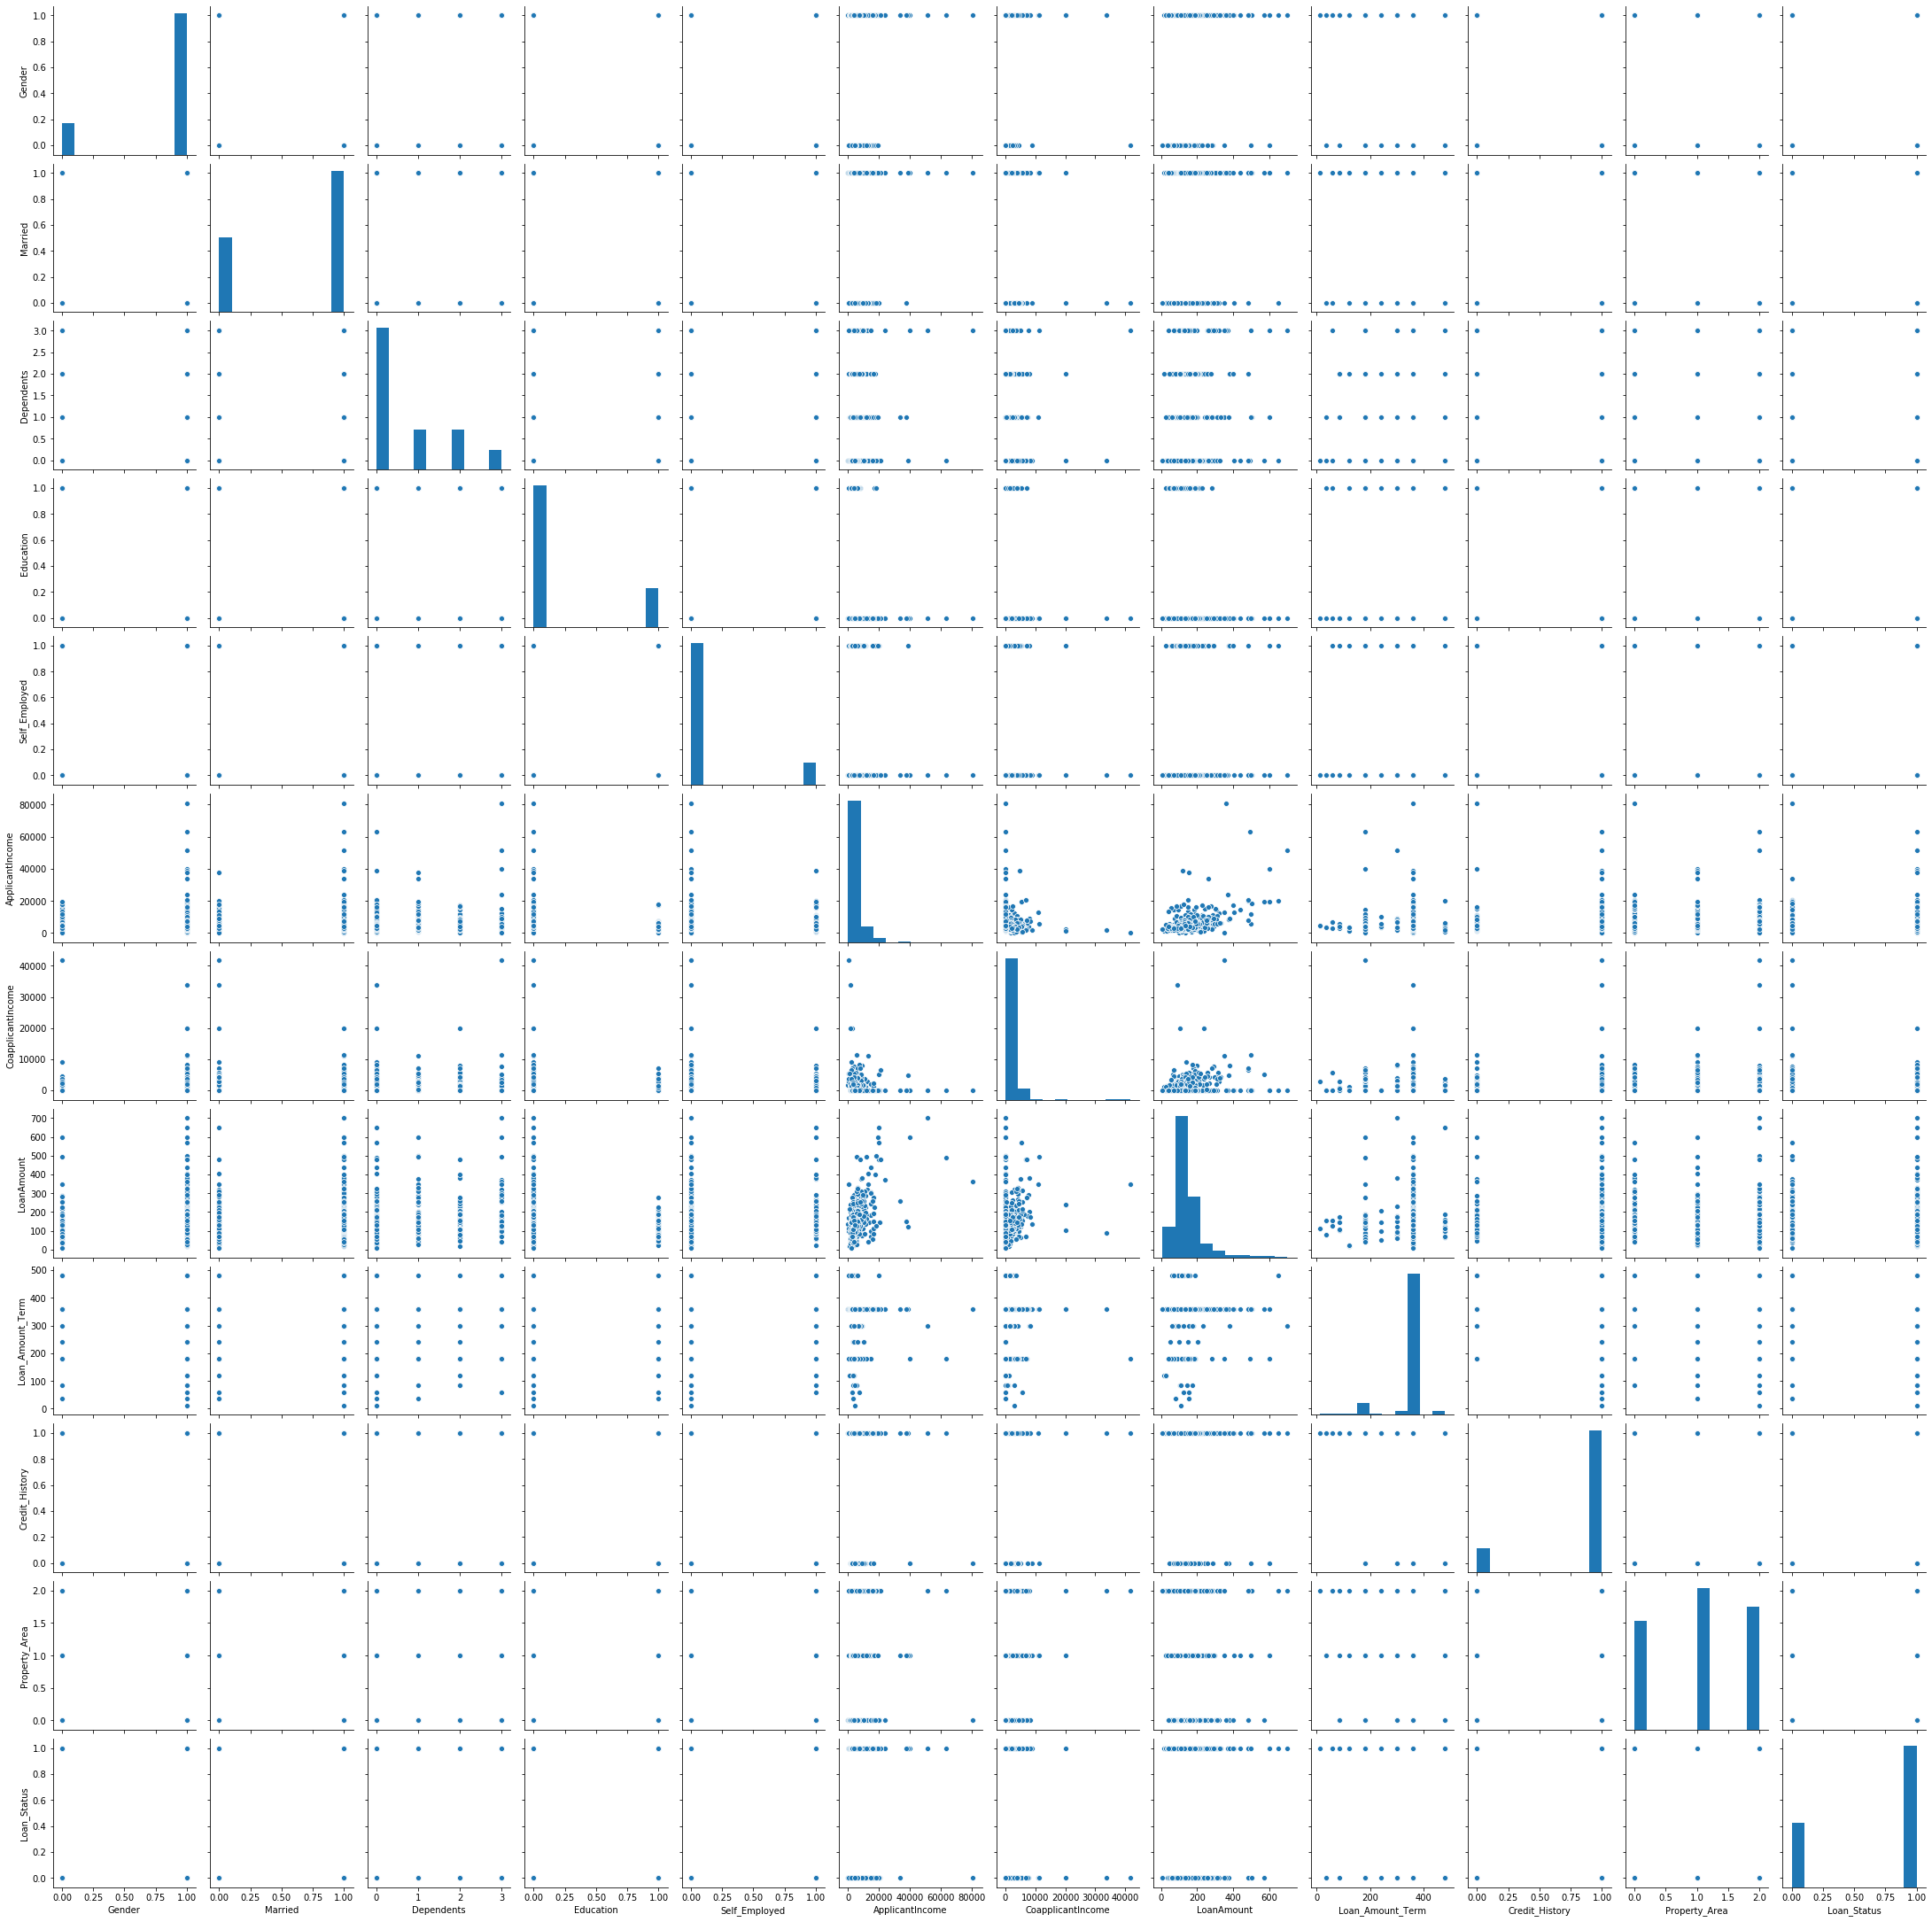

In [114]:
sns.pairplot(df)

In [115]:
df.Dependents.unique()

array([0, 1, 2, 3])

In [117]:
df.Education.unique()

array([0, 1])

In [118]:
df.Property_Area.unique()

array([2, 0, 1])

In [119]:
df.Loan_Status.unique()

array([1, 0])

# Correlation

In [120]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.001963,0.540556


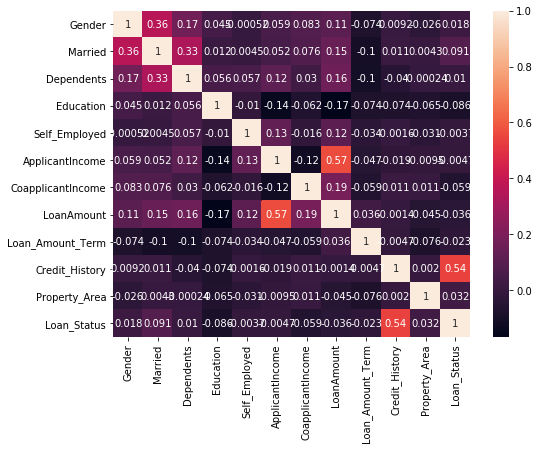

In [122]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

# Removing Outliers

In [123]:
from scipy.stats import zscore
outliers=np.abs(zscore(df))
print(np.where(outliers>3))
thresold=3

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [125]:
print(np.where(outliers>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [126]:
df_new=df[(outliers<3).all(axis=1)]

In [127]:
df.shape

(614, 12)

In [128]:
df_new.shape

(577, 12)

# Remove Skewness

In [129]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [136]:
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [140]:
for col in df_new.columns:
    if df_new.skew().loc[col]<(-0.55):
        df_new[col]=np.log1p(df_new[col])

In [141]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.515225
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -1.595383
Loan_Amount_Term    -2.798893
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Setting x and y variable

In [142]:
x=df_new.iloc[:,0:-1]
x.shape

(577, 11)

In [143]:
y=df_new.iloc[:,-1]
y.shape

(577,)

In [148]:
y=le.fit_transform(y)
y.shape

(577,)

# StandardScaler

In [151]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [152]:
x.shape

(577, 11)

# Classification Process

In [153]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [154]:
def max_acc_score(clf,x,y):
    max_score=0
    for r in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        a_sc=accuracy_score(y_test,pred)
        if a_sc>max_score:
            max_score=a_sc
            a_state=r
            
    print('max score at random_state of',a_state,'is',max_score)
    return a_state

In [249]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_acc_score(lg,x,y)

max score at random_state of 91 is 0.896551724137931


91

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=91)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)

In [251]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.896551724137931


              precision    recall  f1-score   support

           0       1.00      0.57      0.73        28
           1       0.88      1.00      0.94        88

    accuracy                           0.90       116
   macro avg       0.94      0.79      0.83       116
weighted avg       0.91      0.90      0.89       116



[[16 12]
 [ 0 88]]


In [252]:
score=cross_val_score(lg,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]
0.8180809595202397
0.02649724741088433


In [253]:
#auc_roc_score
pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.         0.         0.03571429 0.03571429 0.07142857
 0.07142857 0.10714286 0.10714286 0.14285714 0.14285714 0.17857143
 0.17857143 0.21428571 0.21428571 0.25       0.25       0.28571429
 0.28571429 0.32142857 0.32142857 0.35714286 0.35714286 0.39285714
 0.39285714 1.        ]


[0.         0.01136364 0.05681818 0.05681818 0.06818182 0.06818182
 0.40909091 0.40909091 0.43181818 0.43181818 0.44318182 0.44318182
 0.61363636 0.61363636 0.65909091 0.65909091 0.67045455 0.67045455
 0.69318182 0.69318182 0.88636364 0.88636364 0.90909091 0.90909091
 1.         1.        ]


[1.91142188 0.91142188 0.87697559 0.8692883  0.86731797 0.8653941
 0.822732   0.81622328 0.80773149 0.80710805 0.806507   0.80603418
 0.77127161 0.76367683 0.75321872 0.75081564 0.74897911 0.74460337
 0.74294387 0.74097147 0.70462026 0.68399155 0.66929385 0.66889583
 0.58024207 0.06193627]


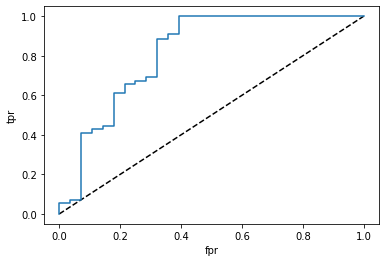

In [254]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [255]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.7857142857142857

In [256]:
lg_score=accuracy_score(y_test,pred),cross_val_score(lg,x,y,cv=5,scoring='accuracy').mean(),roc_auc_score(y_test,pred)

In [258]:
lg_score

(0.896551724137931, 0.8180809595202397, 0.7857142857142857)

# DecisionTreeClassifier

In [259]:
from sklearn.tree import DecisionTreeClassifier

In [260]:
dt=DecisionTreeClassifier()
max_acc_score(dt,x,y)

max score at random_state of 50 is 0.7758620689655172


50

In [261]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=50)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)

In [262]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.8017241379310345


              precision    recall  f1-score   support

           0       0.71      0.61      0.66        36
           1       0.84      0.89      0.86        80

    accuracy                           0.80       116
   macro avg       0.77      0.75      0.76       116
weighted avg       0.80      0.80      0.80       116



[[22 14]
 [ 9 71]]


In [263]:
score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.72413793 0.67241379 0.72173913 0.75652174 0.69565217]
0.7140929535232384
0.028414018401471654


In [264]:
#auc_roc_score
pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.38888889 1.        ]


[0.     0.8875 1.    ]


[2. 1. 0.]


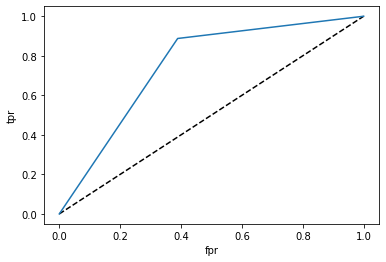

In [265]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='decision tree classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [266]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.7493055555555556

In [267]:
dt_score=accuracy_score(y_test,pred),cross_val_score(dt,x,y,cv=5,scoring='accuracy').mean(),roc_auc_score(y_test,pred)

In [268]:
dt_score

(0.8017241379310345, 0.7262368815592203, 0.7493055555555556)

# KNeighborsClassifier

In [269]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
pr={'n_neighbors':range(1,20)}
gs=GridSearchCV(knn,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'n_neighbors': 17}

In [270]:
knn=KNeighborsClassifier(n_neighbors=17)
sc=max_acc_score(knn,x,y)

max score at random_state of 91 is 0.8706896551724138


In [271]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=91)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [272]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.8706896551724138


              precision    recall  f1-score   support

           0       1.00      0.46      0.63        28
           1       0.85      1.00      0.92        88

    accuracy                           0.87       116
   macro avg       0.93      0.73      0.78       116
weighted avg       0.89      0.87      0.85       116



[[13 15]
 [ 0 88]]


In [273]:
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.81034483 0.79310345 0.7826087  0.84347826 0.82608696]
0.8111244377811093
0.021950663951101648


In [274]:
#auc_roc_score
pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.         0.03571429 0.10714286 0.28571429 0.42857143
 0.46428571 0.46428571 0.5        0.53571429 0.64285714 0.71428571
 0.82142857 0.85714286 0.92857143 1.        ]


[0.         0.05681818 0.22727273 0.38636364 0.54545455 0.77272727
 0.95454545 0.96590909 1.         1.         1.         1.
 1.         1.         1.         1.        ]


[2.         1.         0.94117647 0.88235294 0.82352941 0.76470588
 0.70588235 0.64705882 0.58823529 0.52941176 0.41176471 0.35294118
 0.29411765 0.23529412 0.17647059 0.05882353]


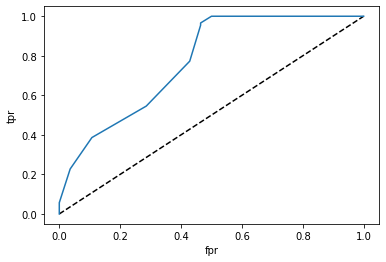

In [275]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='kneighbors classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [276]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.7321428571428572

In [277]:
knn_score=accuracy_score(y_test,pred),cross_val_score(knn,x,y,cv=5,scoring='accuracy').mean(),roc_auc_score(y_test,pred)

In [278]:
knn_score

(0.8706896551724138, 0.8111244377811093, 0.7321428571428572)

# SVC

In [279]:
from sklearn.svm import SVC
svc=SVC()
max_acc_score(svc,x,y)

max score at random_state of 91 is 0.8879310344827587


91

In [280]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=91)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)

In [281]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.8879310344827587


              precision    recall  f1-score   support

           0       1.00      0.54      0.70        28
           1       0.87      1.00      0.93        88

    accuracy                           0.89       116
   macro avg       0.94      0.77      0.81       116
weighted avg       0.90      0.89      0.87       116



[[15 13]
 [ 0 88]]


In [282]:
score=cross_val_score(svc,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]
0.8180809595202397
0.02649724741088433


In [283]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.7678571428571428

In [284]:
svc_score=accuracy_score(y_test,pred),cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean(),roc_auc_score(y_test,pred)

In [285]:
svc_score

(0.8879310344827587, 0.8180809595202397, 0.7678571428571428)

# AdaBoostClassifier

In [286]:
from sklearn.ensemble import AdaBoostClassifier

In [287]:
ada=AdaBoostClassifier()
pr={'learning_rate':[.0001,.001,.01,.1,1],'n_estimators':[10,50,100,150,200,250,300],'base_estimator':[lg,knn,dt,svc]}
gs=GridSearchCV(ada,pr,cv=5)
gs.fit(x,y)
gs.best_params_

{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'learning_rate': 0.01,
 'n_estimators': 300}

In [288]:
ada=AdaBoostClassifier(base_estimator=lg,learning_rate=.01,n_estimators=300)
max_acc_score(ada,x,y)

max score at random_state of 91 is 0.896551724137931


91

In [289]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=91)
ada.fit(x_train,y_train)
pred=ada.predict(x_test)

In [290]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.896551724137931


              precision    recall  f1-score   support

           0       1.00      0.57      0.73        28
           1       0.88      1.00      0.94        88

    accuracy                           0.90       116
   macro avg       0.94      0.79      0.83       116
weighted avg       0.91      0.90      0.89       116



[[16 12]
 [ 0 88]]


In [291]:
score=cross_val_score(ada,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]
0.8180809595202397
0.02649724741088433


In [292]:
#auc_roc_score
pred_prob=ada.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.         0.         0.03571429 0.03571429 0.07142857
 0.07142857 0.10714286 0.10714286 0.14285714 0.14285714 0.17857143
 0.17857143 0.21428571 0.21428571 0.25       0.25       0.28571429
 0.28571429 0.32142857 0.32142857 0.35714286 0.35714286 0.39285714
 0.39285714 0.42857143 0.42857143 1.        ]


[0.         0.01136364 0.11363636 0.11363636 0.125      0.125
 0.38636364 0.38636364 0.39772727 0.39772727 0.51136364 0.51136364
 0.57954545 0.57954545 0.63636364 0.63636364 0.64772727 0.64772727
 0.75       0.75       0.90909091 0.90909091 0.95454545 0.95454545
 0.98863636 0.98863636 1.         1.        ]


[1.60765872 0.60765872 0.59679739 0.59553485 0.5954921  0.59454853
 0.58740221 0.58732987 0.5869307  0.58690088 0.58184415 0.58142809
 0.57894945 0.57886758 0.57459492 0.57305912 0.57252022 0.57224772
 0.56803565 0.56776739 0.55989864 0.55941459 0.55128188 0.54737076
 0.54522663 0.5431105  0.5397377  0.44477789]


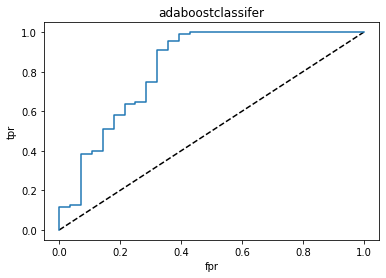

In [293]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Adaboost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('adaboostclassifer')
plt.show()

In [294]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.7857142857142857

In [295]:
ada_score=accuracy_score(y_test,pred),cross_val_score(ada,x,y,cv=5,scoring='accuracy').mean(),roc_auc_score(y_test,pred)

# Naive_Bayes

In [296]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
max_acc_score(gn,x,y)

max score at random_state of 91 is 0.896551724137931


91

In [297]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=91)
gn.fit(x_train,y_train)
pred=gn.predict(x_test)

In [298]:
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

0.896551724137931


              precision    recall  f1-score   support

           0       1.00      0.57      0.73        28
           1       0.88      1.00      0.94        88

    accuracy                           0.90       116
   macro avg       0.94      0.79      0.83       116
weighted avg       0.91      0.90      0.89       116



[[16 12]
 [ 0 88]]


In [299]:
score=cross_val_score(ada,x,y,cv=5,scoring='accuracy')
print(score)
print(score.mean())
print(score.std())

[0.81034483 0.79310345 0.79130435 0.86086957 0.83478261]
0.8180809595202397
0.02649724741088433


In [300]:
#auc_roc_score
pred_prob=ada.predict_proba(x_test)[:,1]
fpr,tpr,thresold=roc_curve(y_test,pred_prob)
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresold)

[0.         0.         0.         0.03571429 0.03571429 0.07142857
 0.07142857 0.10714286 0.10714286 0.14285714 0.14285714 0.17857143
 0.17857143 0.21428571 0.21428571 0.25       0.25       0.28571429
 0.28571429 0.32142857 0.32142857 0.35714286 0.35714286 0.39285714
 0.39285714 0.42857143 0.42857143 1.        ]


[0.         0.01136364 0.11363636 0.11363636 0.125      0.125
 0.38636364 0.38636364 0.39772727 0.39772727 0.51136364 0.51136364
 0.57954545 0.57954545 0.63636364 0.63636364 0.64772727 0.64772727
 0.75       0.75       0.90909091 0.90909091 0.95454545 0.95454545
 0.98863636 0.98863636 1.         1.        ]


[1.60765872 0.60765872 0.59679739 0.59553485 0.5954921  0.59454853
 0.58740221 0.58732987 0.5869307  0.58690088 0.58184415 0.58142809
 0.57894945 0.57886758 0.57459492 0.57305912 0.57252022 0.57224772
 0.56803565 0.56776739 0.55989864 0.55941459 0.55128188 0.54737076
 0.54522663 0.5431105  0.5397377  0.44477789]


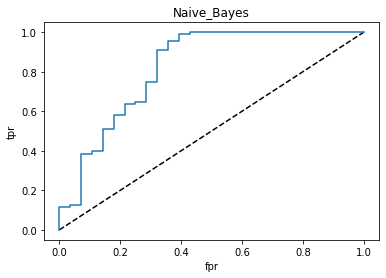

In [301]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Naive_Bayes')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive_Bayes')
plt.show()

In [302]:
#auc score
roc_score=roc_auc_score(y_test,pred)
roc_score

0.7857142857142857

In [303]:
gn_score=accuracy_score(y_test,pred),cross_val_score(gn,x,y,cv=5,scoring='accuracy').mean(),roc_auc_score(y_test,pred)

# Saving Model

In [314]:
data={'logistic':lg_score,'kneighbors':knn_score,'decisiontreeclassifier':dt_score,'SVC':svc_score,'adaboost':ada_score,'gaussianNB':gn_score}

In [319]:
selection=pd.DataFrame(data,index=['accuracy_score','cross_val_score','roc_score'])

In [320]:
selection

,logistic,kneighbors,decisiontreeclassifier,SVC,adaboost,gaussianNB
accuracy_score,0.896552,0.870690,0.801724,0.887931,0.896552,0.896552
cross_val_score,0.818081,0.811124,0.726237,0.818081,0.818081,0.812864
roc_score,0.785714,0.732143,0.749306,0.767857,0.785714,0.785714


In this dataset logisticregression,adaboostclassifier and gaussiannb are performing similarly acoording to thier score.......we select the logisticregression model for this dataset

In [321]:
from sklearn.externals import joblib

In [323]:
joblib.dump(lg,'lg_model_loan_dataset.obj')

['lg_model_loan_dataset.obj']